In [3]:
import pandas as pd
import numpy as np

In [4]:
data1 = pd.read_excel("Copy of JPN Data.xlsx")
data1.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [5]:
data1['ANN_INCOME($)'] = data1['ANN_INCOME']*0.00641  

In [6]:
def categorize_car_age(days):
        if days < 200:
            return 1
        elif 200 <= days <= 360:
            return 2
        elif 360 < days <= 500:
            return 3
        else:
            return 4

In [7]:
data1['AGE_CAR(Category)'] = data1['AGE_CAR'].apply(categorize_car_age)

In [8]:
data1['GENDER(1,0)'] = data1['GENDER'].apply(lambda x: 1 if x == 'M' else 0)

In [9]:
data1.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE,ANN_INCOME($),AGE_CAR(Category),"GENDER(1,0)"
0,00001Q15YJ,50,M,445344.000000,439,0,2854.655040,3,1
1,00003I71CQ,35,M,107634.000000,283,0,689.933940,2,1
2,00003N47FS,59,F,502786.666667,390,1,3222.862533,3,0
3,00005H41DE,43,M,585664.000000,475,0,3754.106240,3,1
4,00007E17UM,39,F,705722.666667,497,1,4523.682293,3,0


In [10]:
X = data1.drop(columns=['ID','GENDER','ANN_INCOME','AGE_CAR','PURCHASE'])
Y = data1['PURCHASE']
X.head()

,CURR_AGE,ANN_INCOME($),AGE_CAR(Category),"GENDER(1,0)"
0,50,2854.655040,3,1
1,35,689.933940,2,1
2,59,3222.862533,3,0
3,43,3754.106240,3,1
4,39,4523.682293,3,0


In [11]:
print(Y.shape)
print(X.shape)

(40000,)
(40000, 4)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,auc,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y, test_size= 0.2, random_state= 42)

In [14]:
model = LogisticRegression()
model.fit(xTrain,yTrain)

LogisticRegression()

In [15]:
yPred = model.predict(xTest)

In [16]:
acccuracy = accuracy_score(yTest,yPred)
print(acccuracy)

0.69375


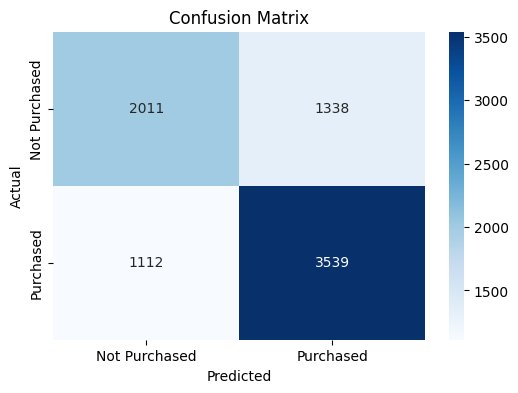

In [17]:
confusionMatrix = confusion_matrix(yTest,yPred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
cfReport = classification_report(yTest,yPred)
print(cfReport)

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      3349
           1       0.73      0.76      0.74      4651

    accuracy                           0.69      8000
   macro avg       0.68      0.68      0.68      8000
weighted avg       0.69      0.69      0.69      8000



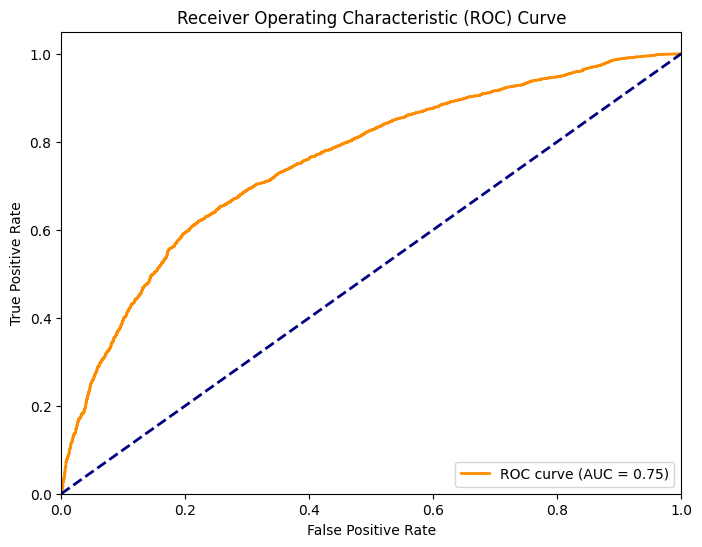

In [21]:
yPredProbab = model.predict_proba(xTest)[:,1]


fpr, tpr, _ = roc_curve(yTest, yPredProbab)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
import pickle

with open('LogiTrainedJpModel.pkl','wb') as file:
    pickle.dump(model,file)